In [10]:
import helper
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [22]:
#goal simulate labeling patterns

n=100
c13ab = 0.011 #natural abundance
N = [(1-c13ab)**2,2*(1-c13ab)*c13ab,c13ab**2] #get expected labeling of precursor from natural abundance
isa_func = helper.palmitateISA

gs = np.random.random(n)
xs = np.array([x/np.sum(x) for x in np.random.random((n,3))])
T = [0,0,1]
noiseFrac = .05

In [23]:
labeling_theo = []
for g,x in zip(gs,xs):
    labeling_theo.append(isa_func(g,1,x,N,None))
labeling_theo = np.array(labeling_theo)

In [24]:
g_preds = []
x_preds = []
x_trues = []
l_preds = []
l_observed = []
l_theo = []

for g,x,l_true in zip(gs,xs,labeling_theo):
    noise = np.random.random(l_true.shape)
    noise = noiseFrac * noise / np.sum(noise)
    l_obs = [l+ns for l,ns in zip(l_true,noise)]
    l_obs = np.array(l_obs)/np.sum(l_obs)

    x_trues += list(x)
    g_pred, _, x_pred, err, l_pred = helper.ISAFit(T,N,l_obs,isa_func,list(range(len(l_obs))),.5)
    g_preds.append(g_pred)
    x_preds += list(x_pred)
    l_preds += list(l_pred)
    l_observed += list(l_obs)
    l_theo += list(l_true)

Text(0.5, 1.0, 'P 0.05 R2 = 1.0')

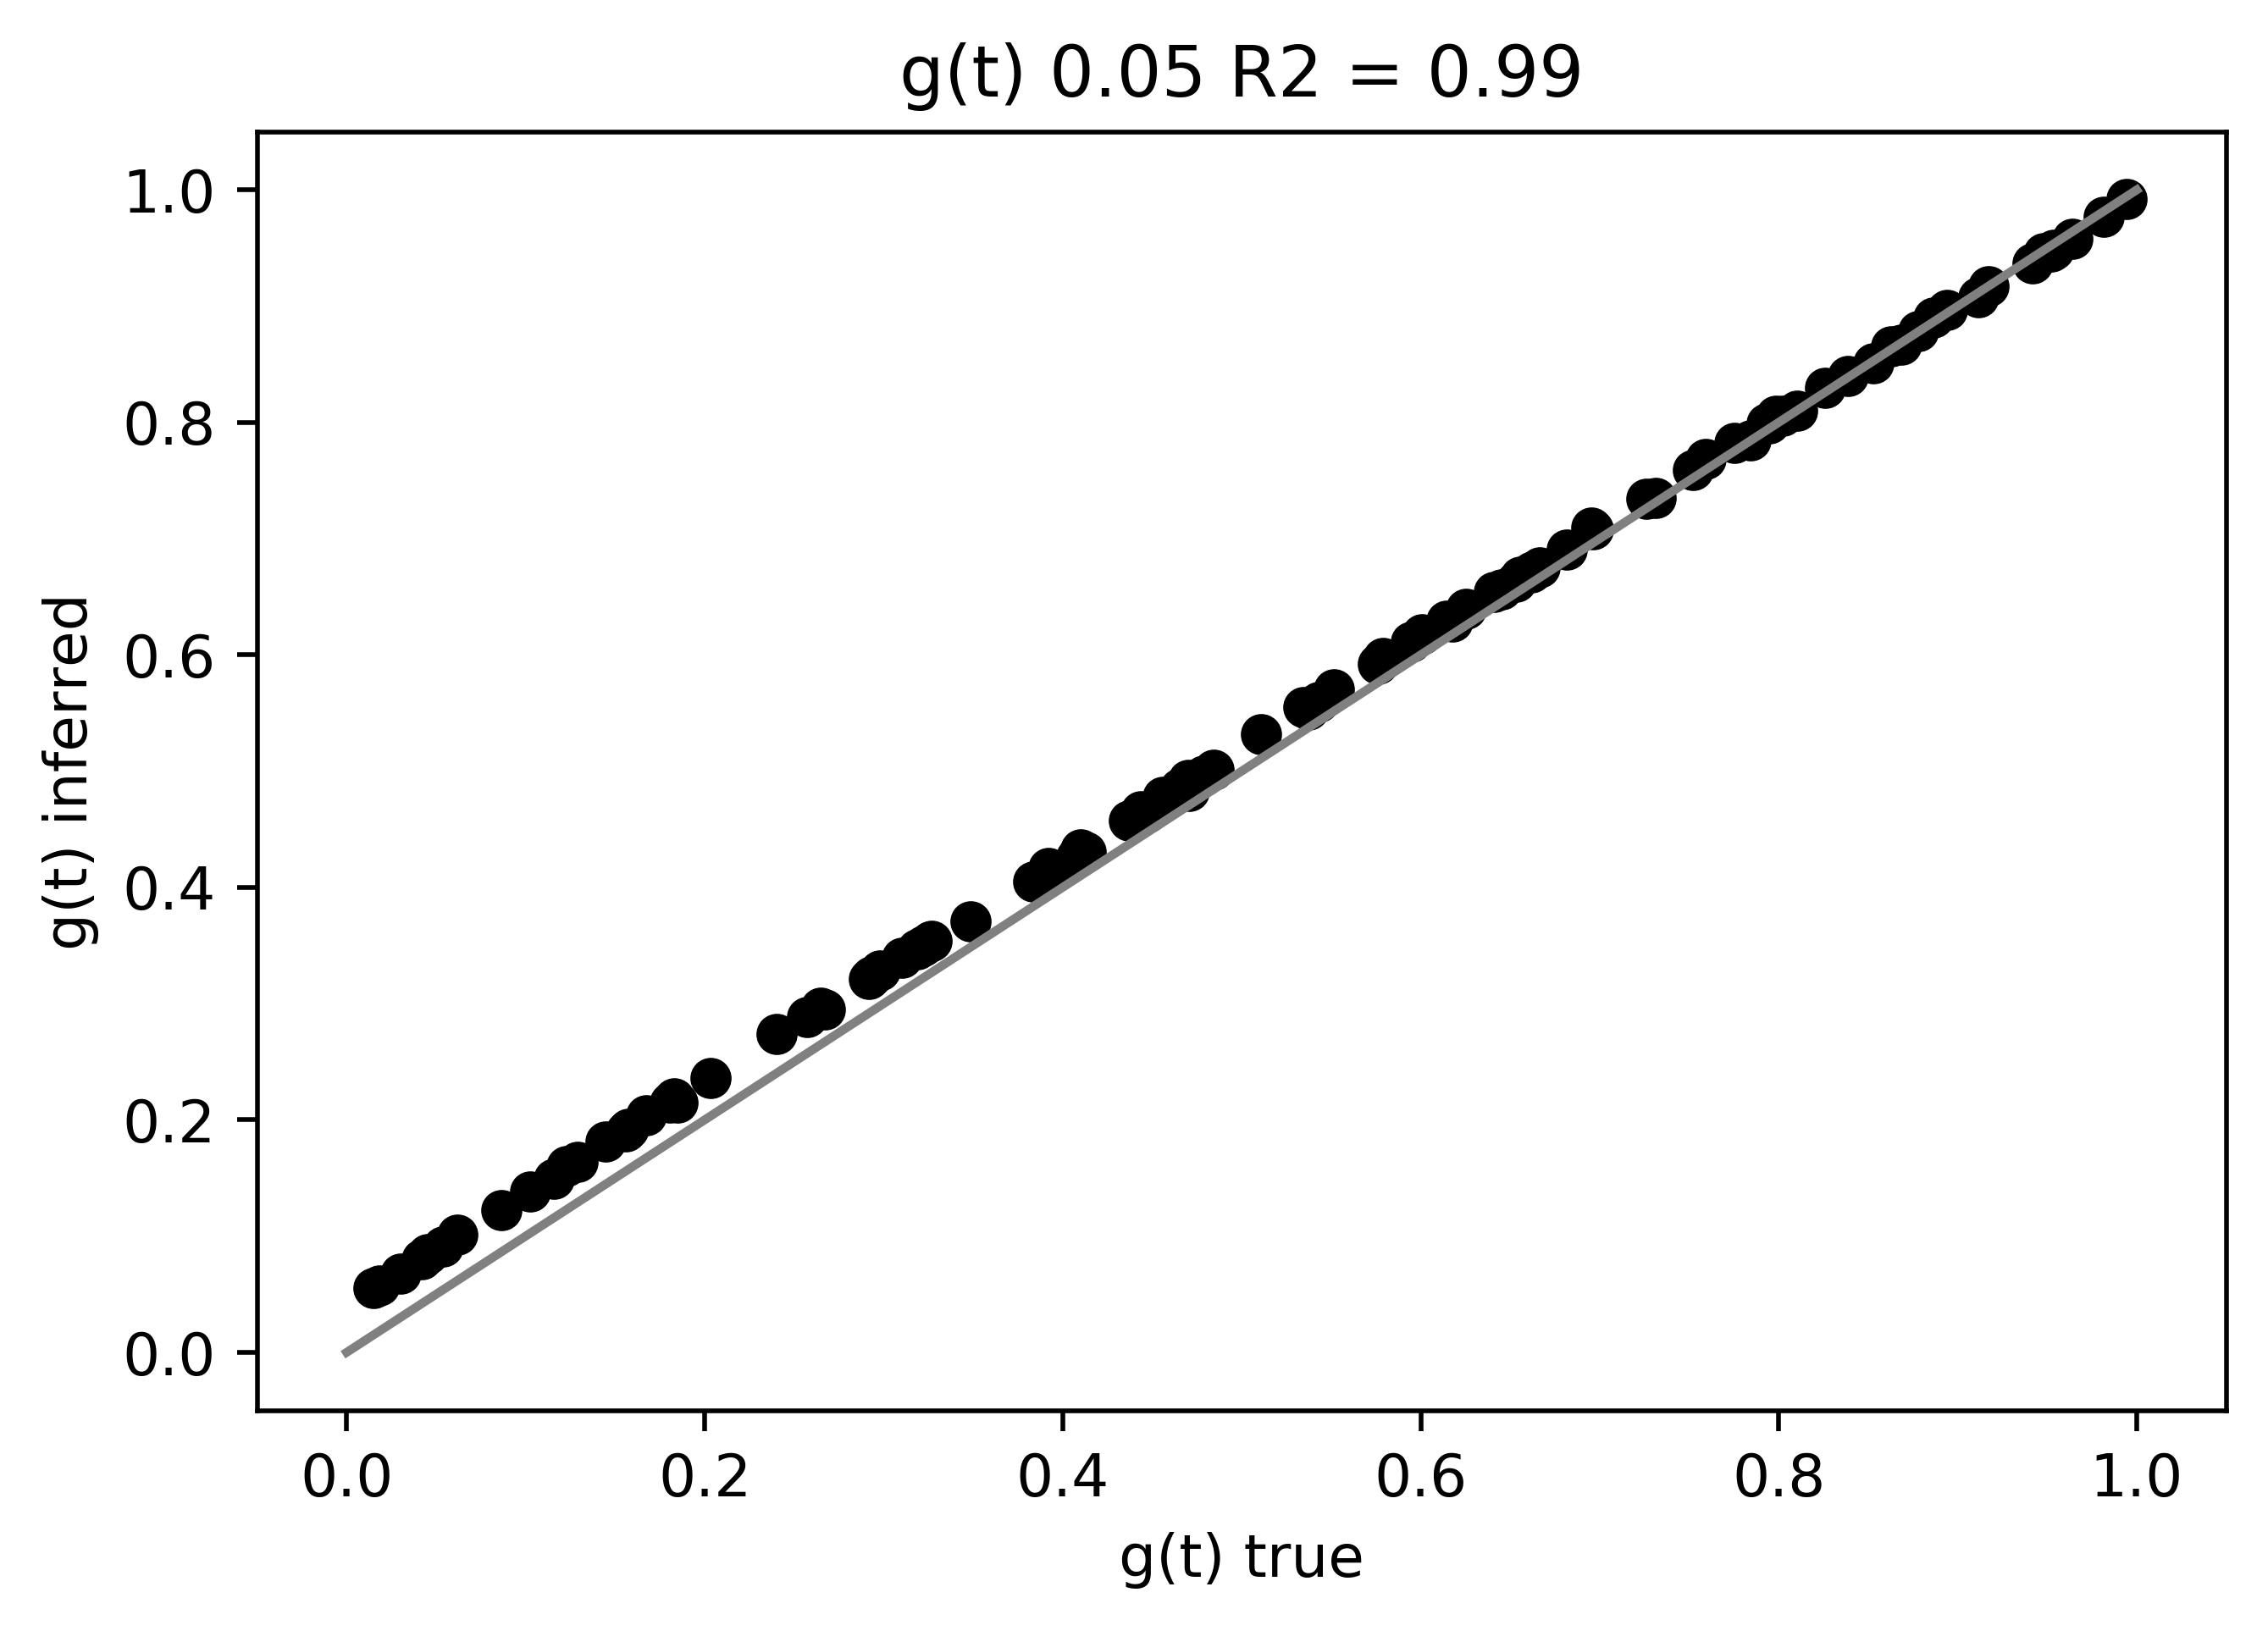

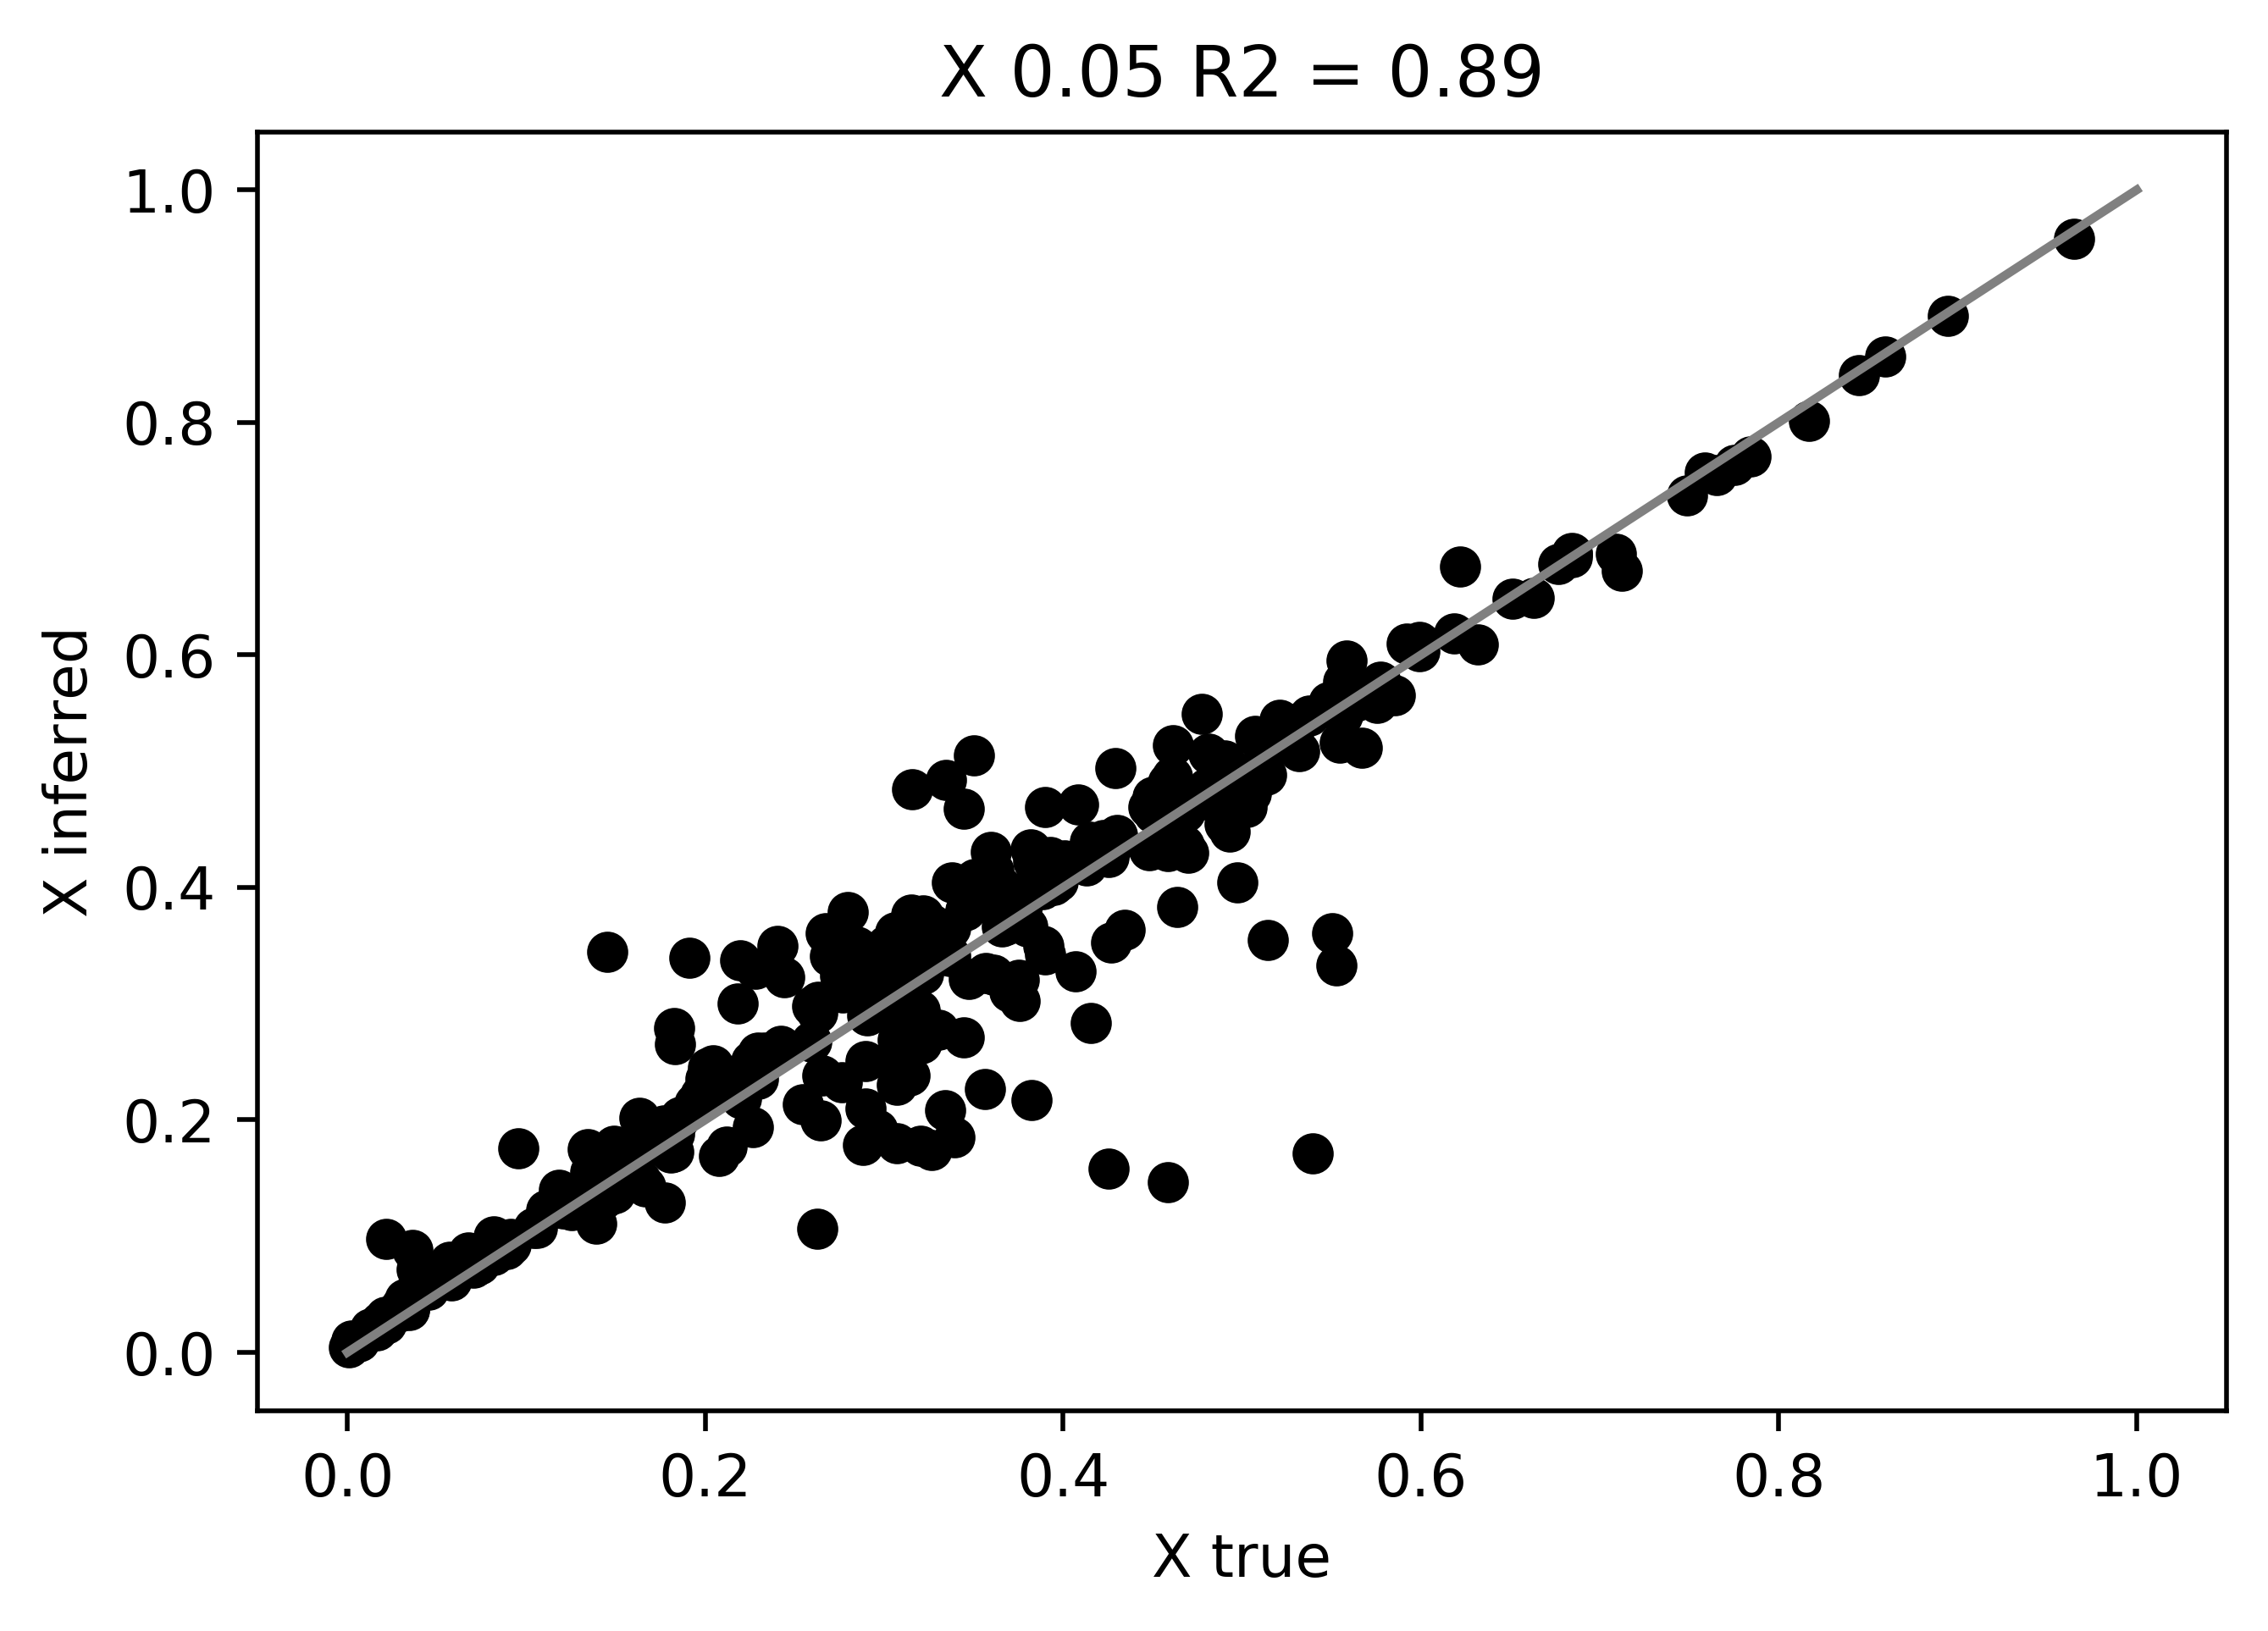

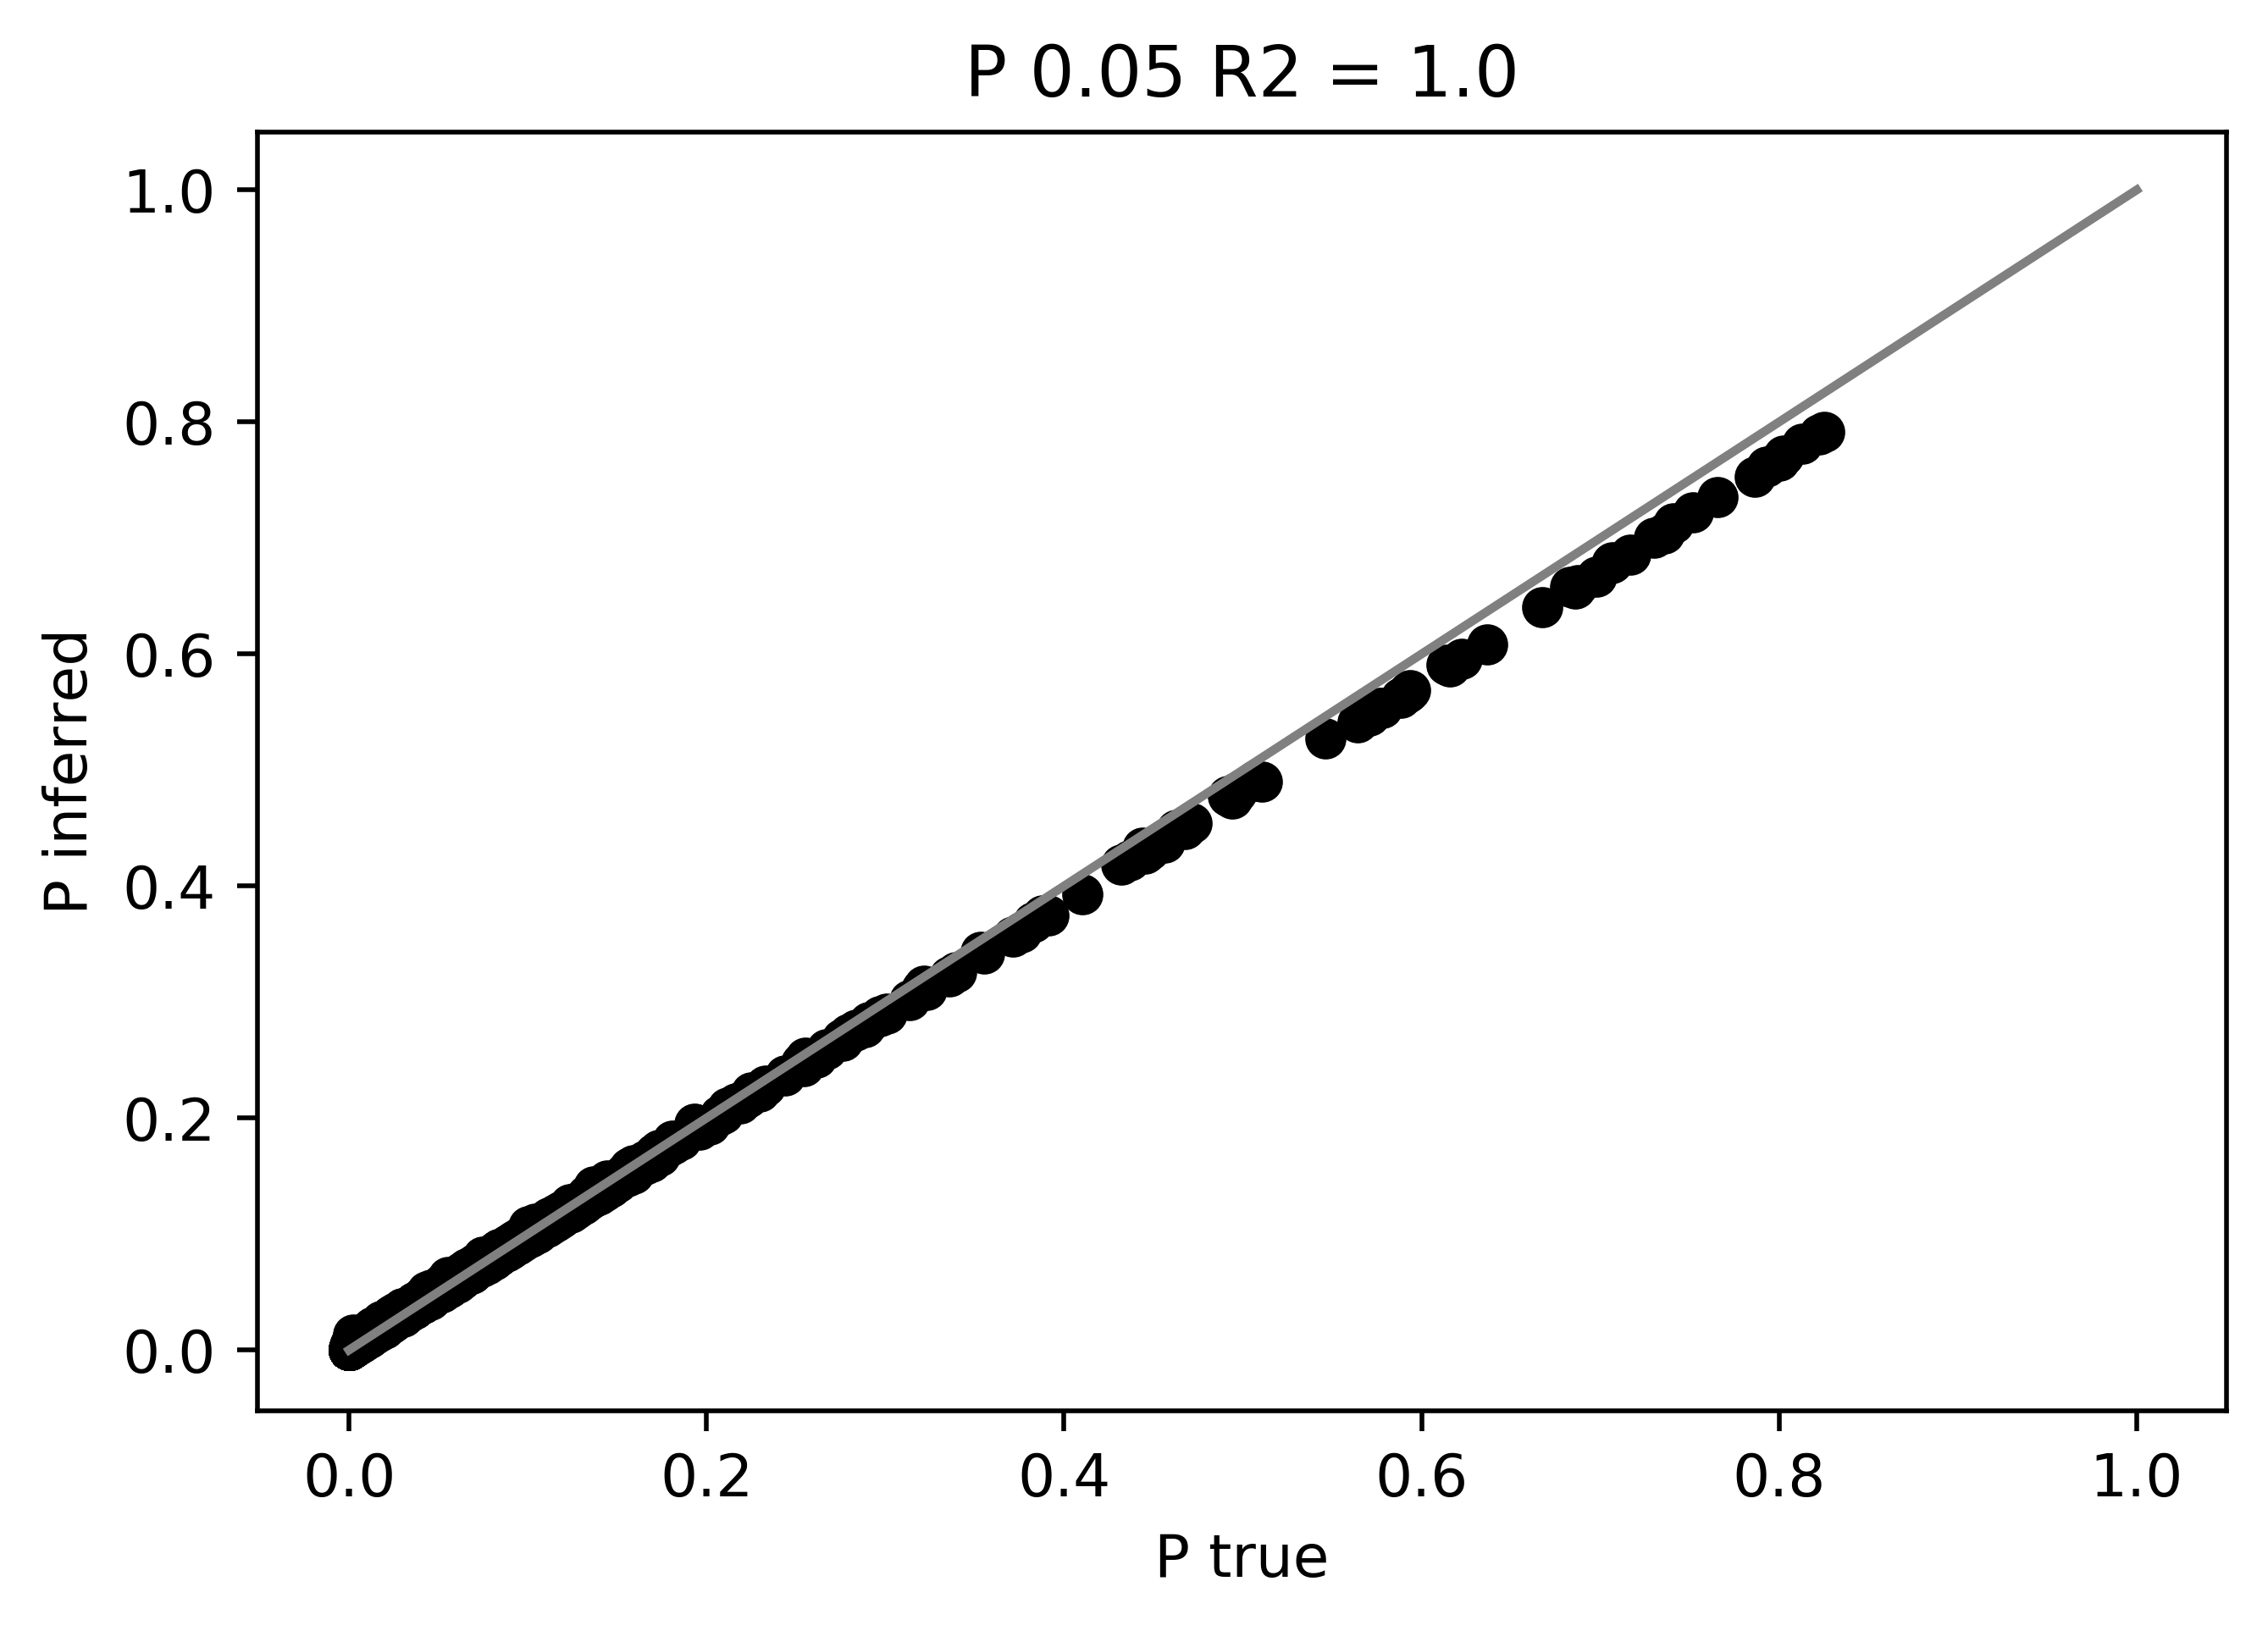

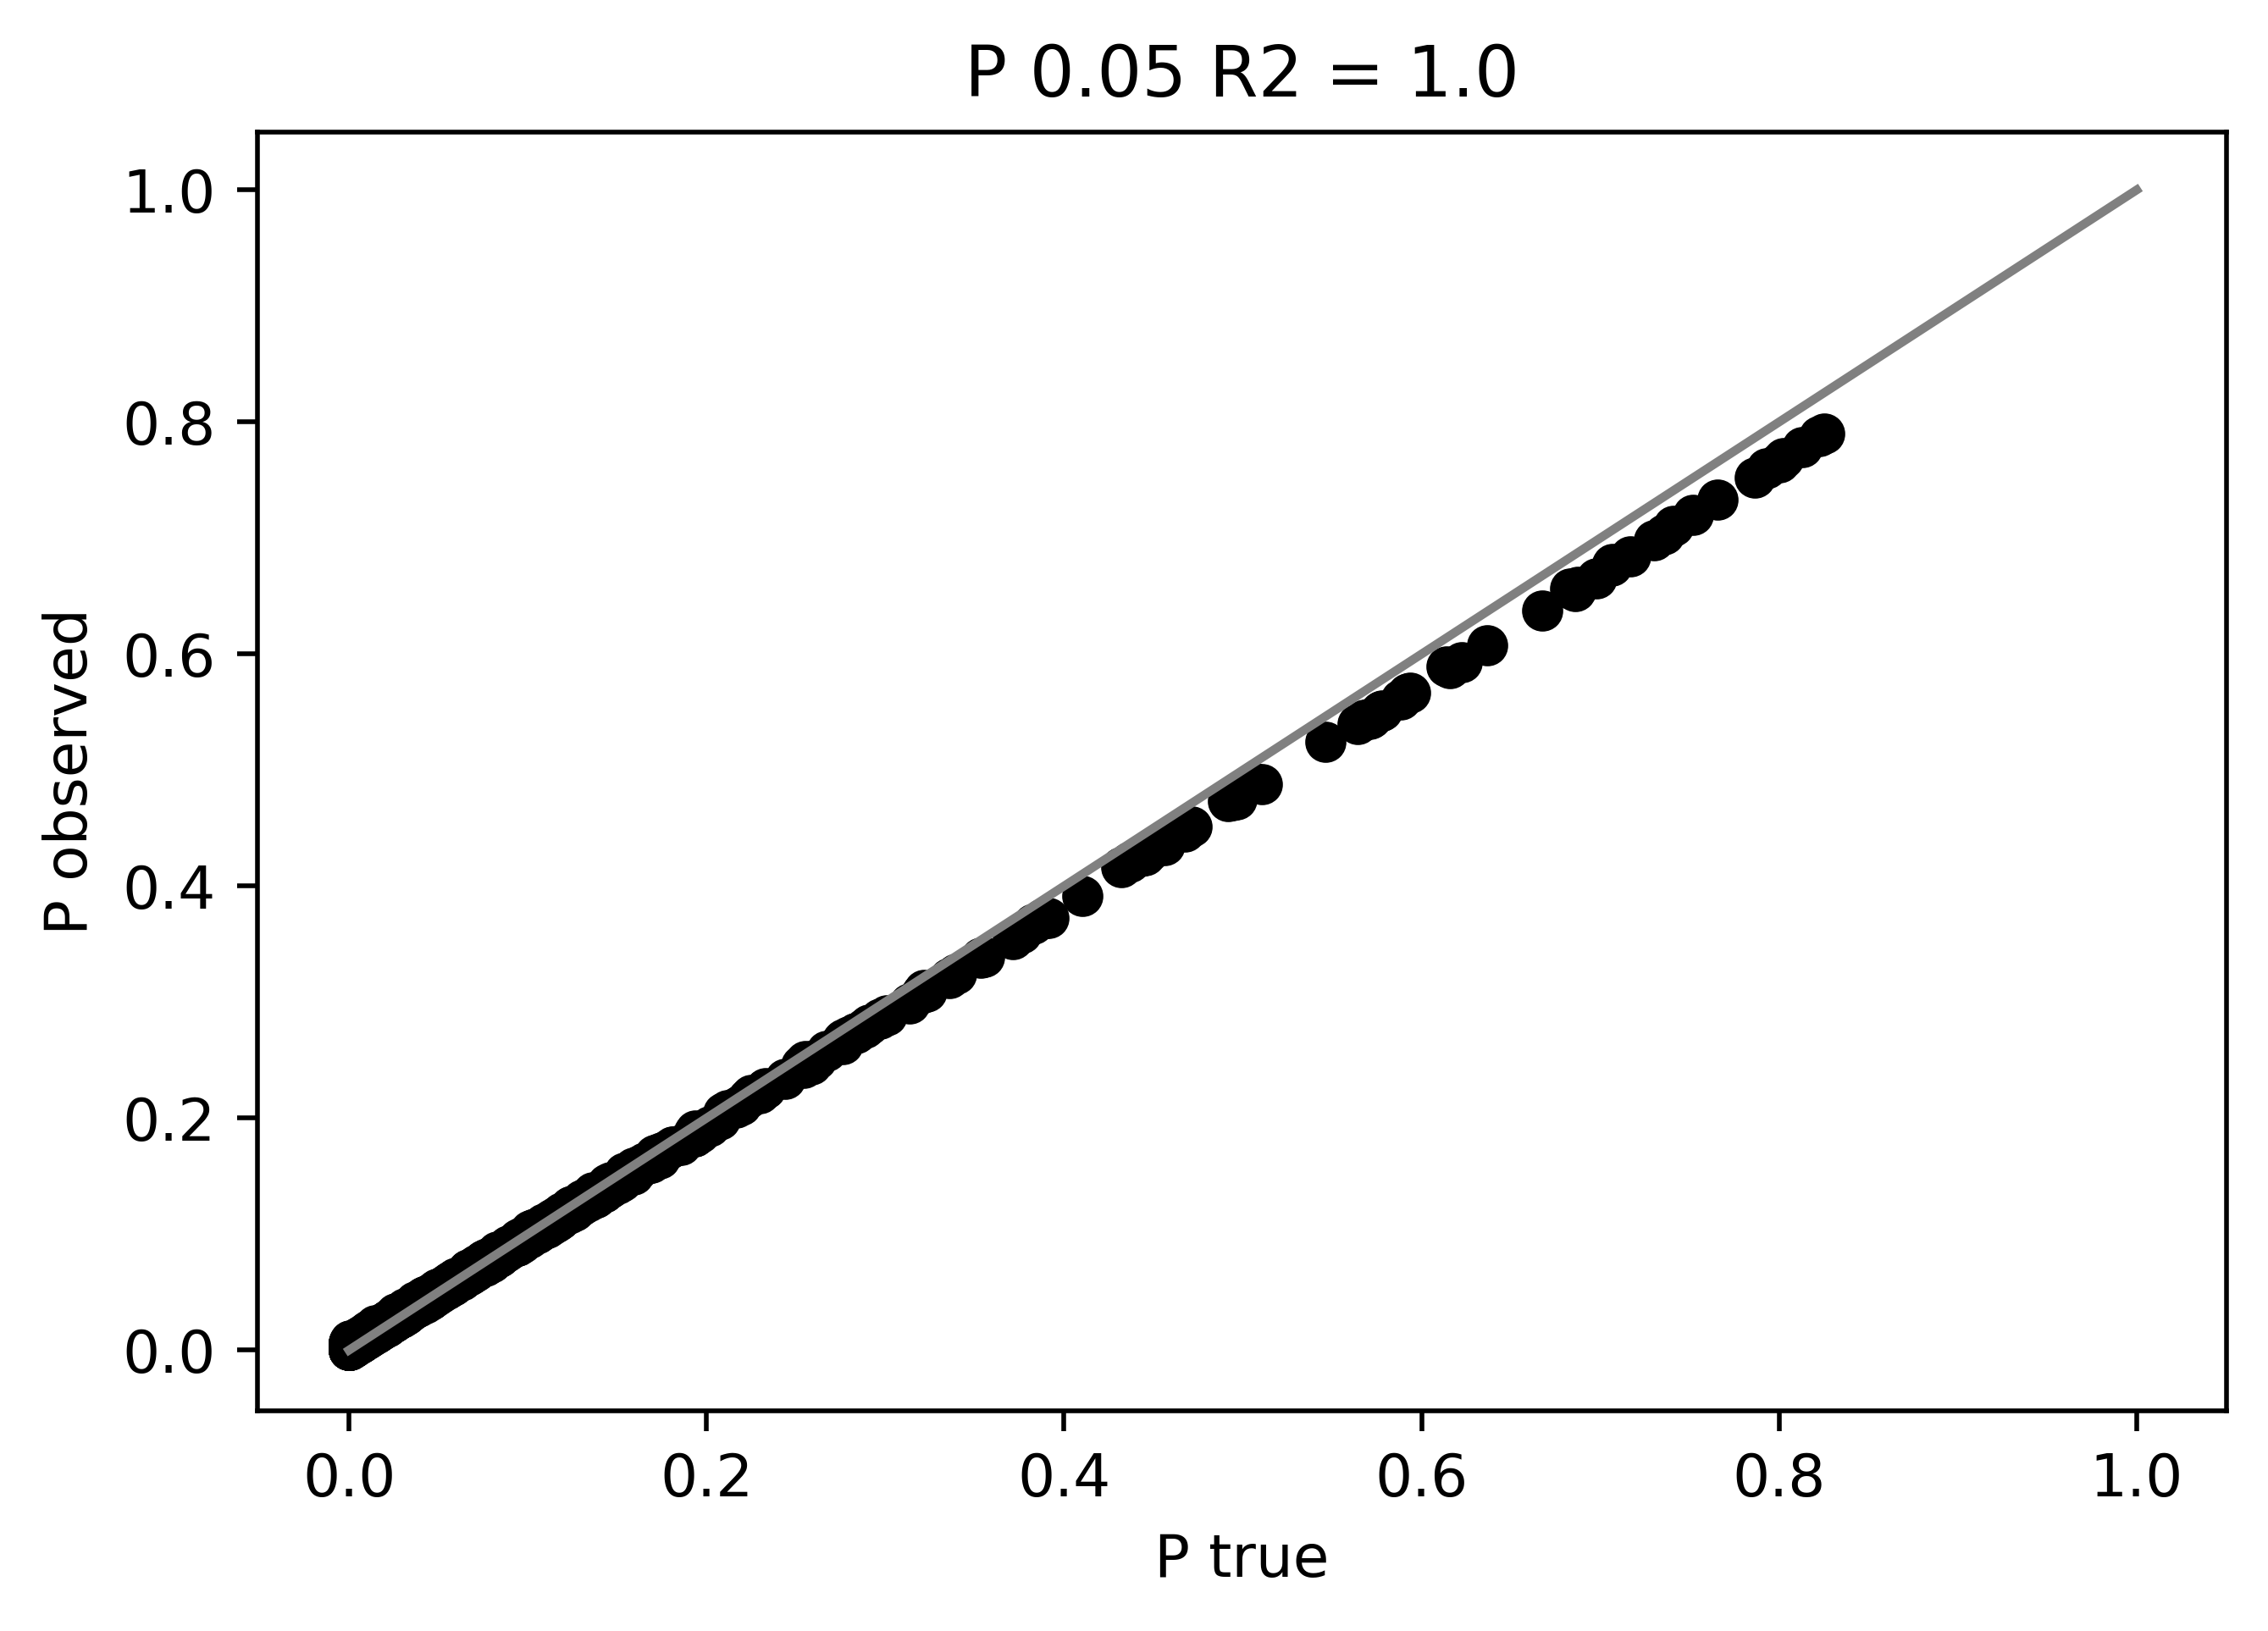

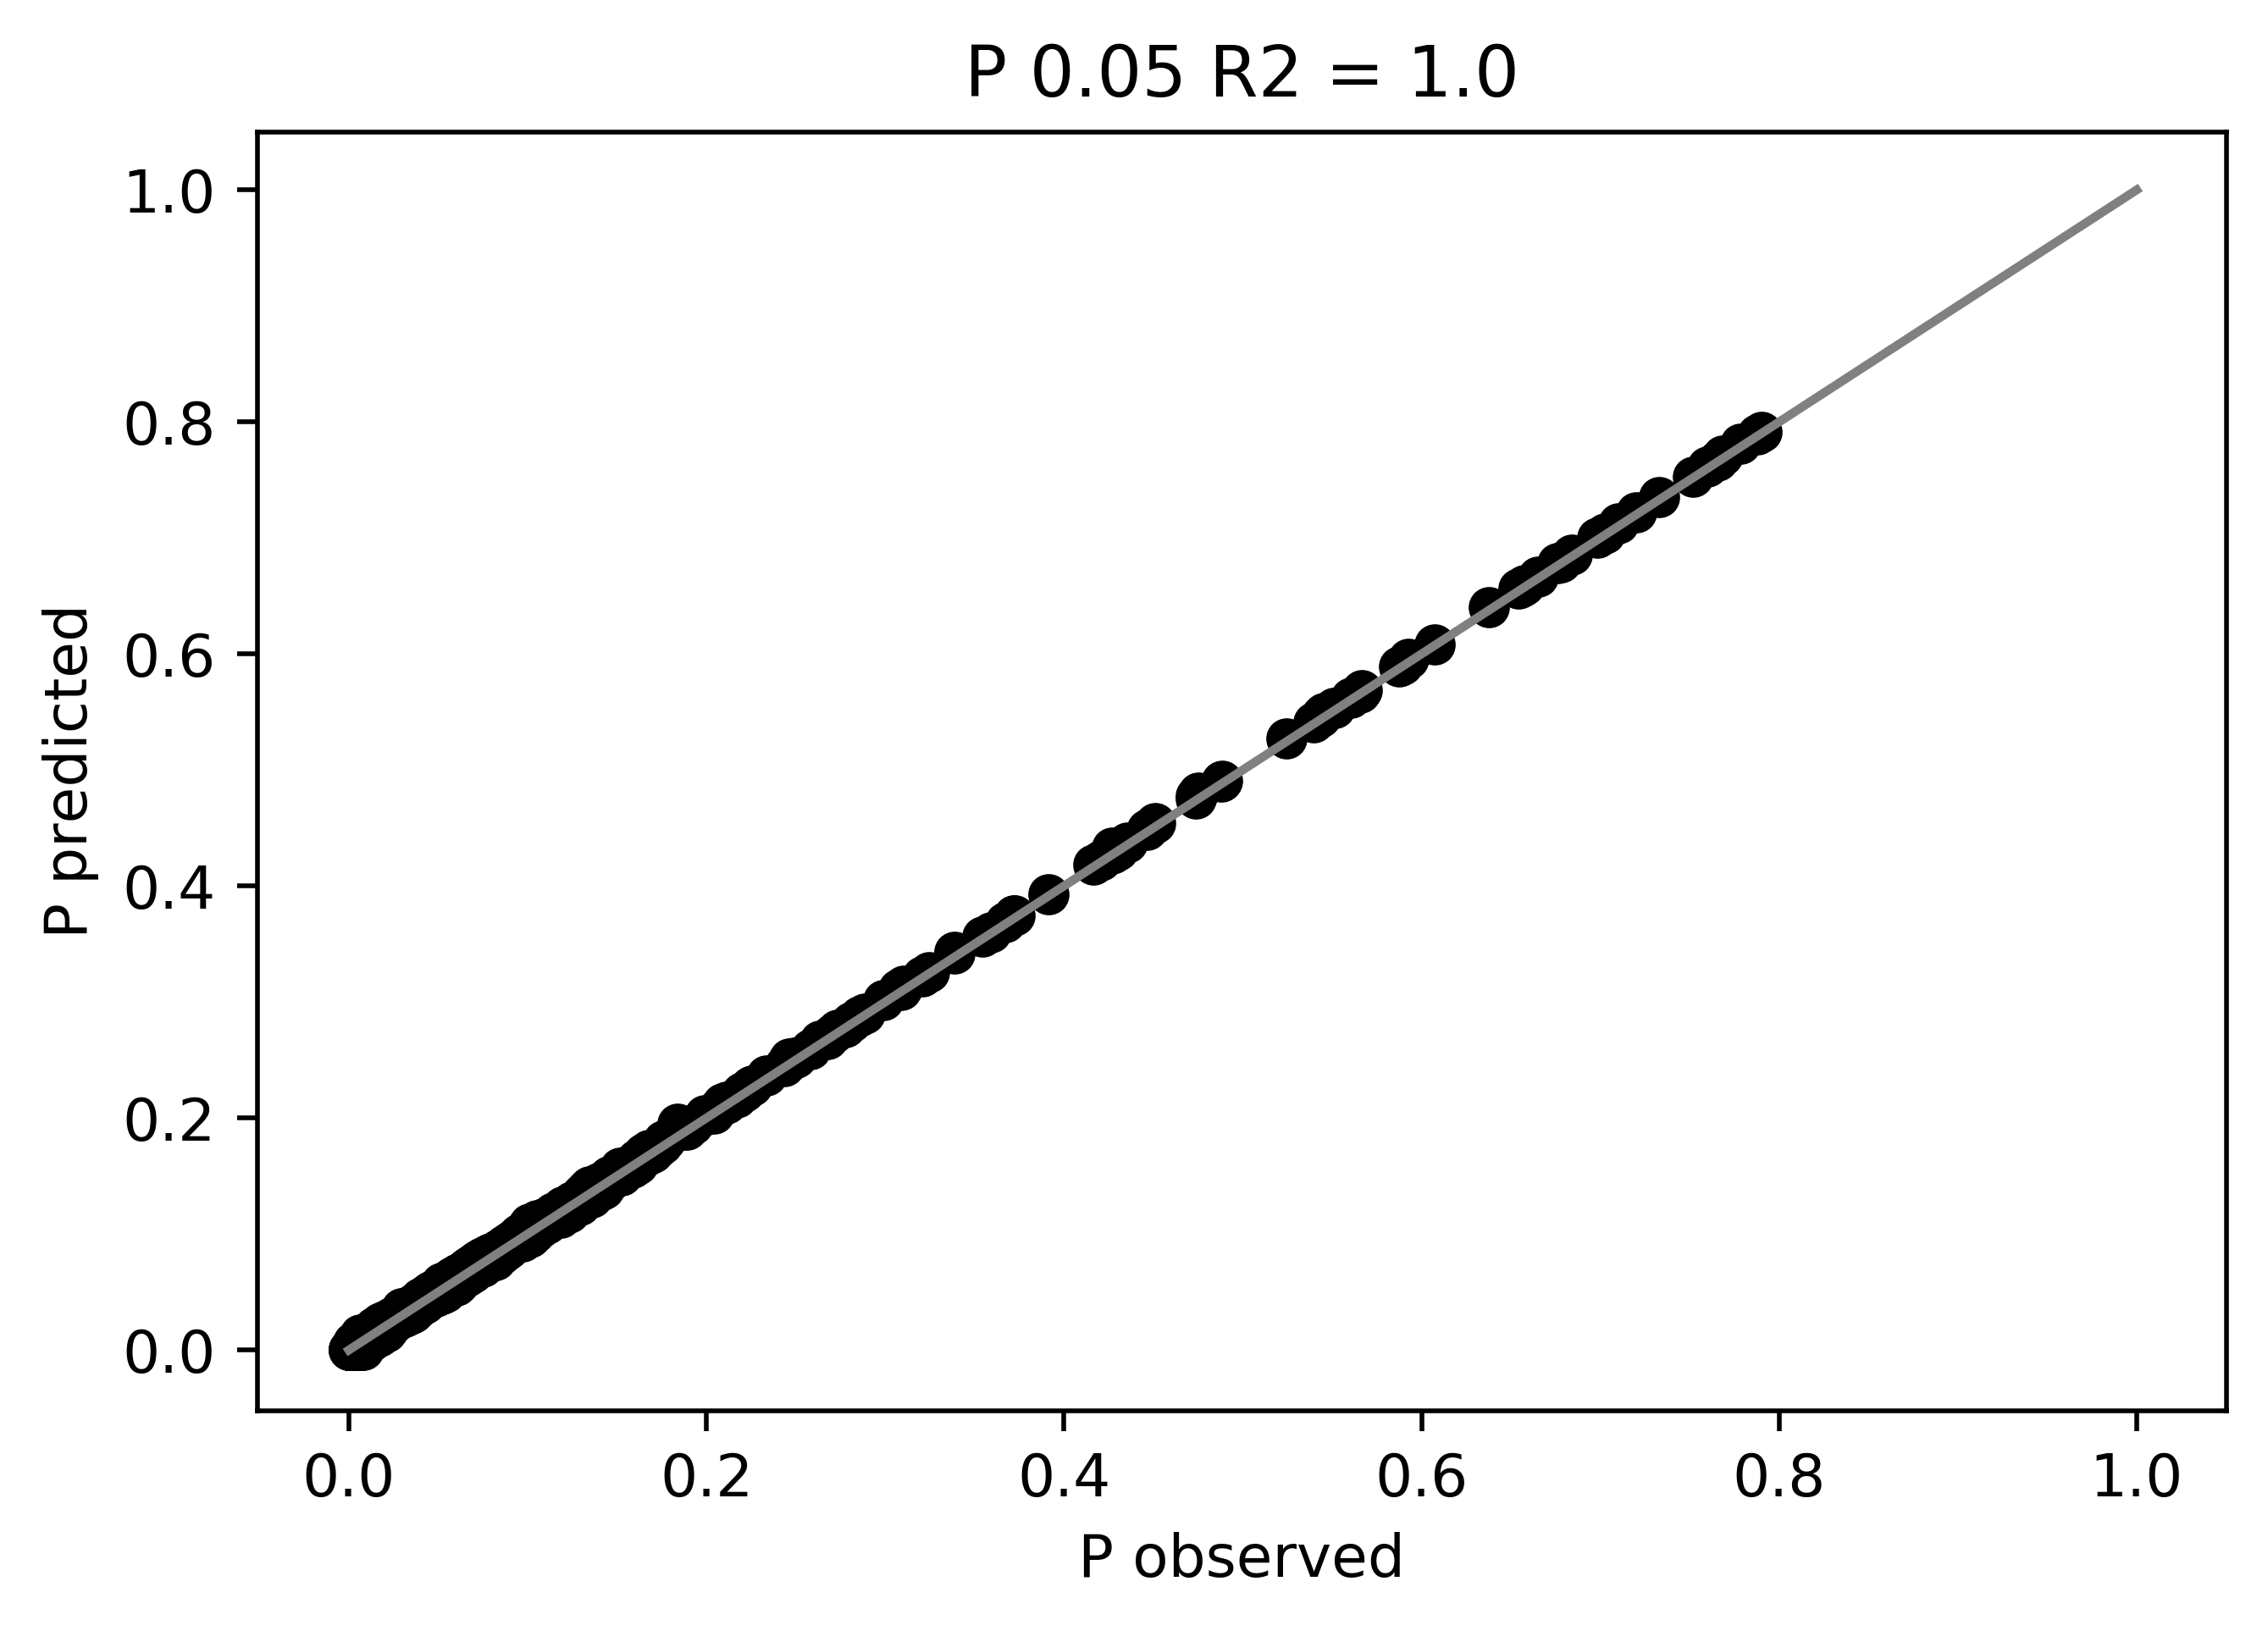

In [26]:
plt.figure()
plt.scatter(gs,g_preds,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("g(t) true")
plt.ylabel("g(t) inferred")
plt.title("g(t) " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(gs,g_preds),2)))

plt.figure()
plt.scatter(x_trues,x_preds,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("X true")
plt.ylabel("X inferred")
plt.title("X " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(x_trues,x_preds),2)))

plt.figure()
plt.scatter(l_theo,l_preds,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("P true")
plt.ylabel("P inferred")
plt.title("P " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(l_theo,l_preds),2)))


plt.figure()
plt.scatter(l_theo,l_observed,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("P true")
plt.ylabel("P observed")
plt.title("P " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(l_theo,l_observed),2)))


plt.figure()
plt.scatter(l_observed,l_preds,color="black")
plt.plot([0,1],[0,1],color="grey")
plt.xlabel("P observed")
plt.ylabel("P predicted")
plt.title("P " + str(noiseFrac) + " R2 = " + str(np.round(r2_score(l_observed,l_preds),2)))